<a href="https://colab.research.google.com/github/Chinmayadas2003/Data-Science-Resources/blob/master/copy_of_convolutioal_neural_network_for_bianary_clssification_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2023-01-14 18:07:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  16.4MB/s    in 8.2s    

2023-01-14 18:08:07 (12.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
##Inspect the data become one with the data
!ls pizza_steak
!ls pizza_steak/test/
!ls pizza_steak/train/steak



test  train
pizza  steak
1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447

In [ ]:
#walk thurogh the pizza _steak directory and list the number of files
import os
for dirpath,dirnames,filenames,in os.walk("pizza_steak"):
  print(f"There are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

# the extra in our pizza-directory is "ds.store"
!ls -la pizza_steak

There are2 directories and 0 images in 'pizza_steak'
There are2 directories and 0 images in 'pizza_steak/test'
There are0 directories and 250 images in 'pizza_steak/test/pizza'
There are0 directories and 250 images in 'pizza_steak/test/steak'
There are2 directories and 0 images in 'pizza_steak/train'
There are0 directories and 750 images in 'pizza_steak/train/pizza'
There are0 directories and 750 images in 'pizza_steak/train/steak'
total 16
drwxr-xr-x 4 root root 4096 Jan 14 18:08 .
drwxr-xr-x 1 root root 4096 Jan 14 18:08 ..
drwxr-xr-x 4 root root 4096 Jan 14 18:08 test
drwxr-xr-x 4 root root 4096 Jan 14 18:08 train


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)


['pizza' 'steak']


Image shape: (512, 512, 3)


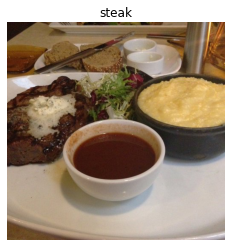

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#set the seed
tf.random.set_seed(42)

#preprocessing the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir ="/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from direcotries and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",seed=42)

valid_data= valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",seed=42)

#create a cnn mode(same as Tiny VGG on the cnn explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,2,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 234ms/step - loss: 0.5573 - accuracy: 0.7180 - val_loss: 0.4404 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4459 - accuracy: 0.7960 - val_loss: 0.3732 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4080 - accuracy: 0.8273 - val_loss: 0.3812 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3797 - accuracy: 0.8340 - val_loss: 0.3369 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3333 - accuracy: 0.8620 - val_loss: 0.3346 - val_accuracy: 0.8640
